In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
df= pd.read_csv('shopping_trends.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [6]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## 1. Pada season apa customer banyak melakukan pembelian?

In [7]:
df['Season'].mode()[0]

'Spring'

In [8]:
df['Season'].count()

3900

In [9]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [10]:
# def make_pivot(param1,param2):
#     df_slice = df[[param1, param2, 'Customer ID']]
#     slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2], \
#                                        aggfunc=np.size, fill_value=0)
#     p_chart = slice_pivot.plot(kind='bar');
#     for p in p_chart.patches:
#         p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
#         return slice_pivot
#         return p_chart
# make_pivot('Shipping Type','Gender')


Pivot Table:
        Customer ID
Season             
Spring          999
Fall            975
Winter          971
Summer          955


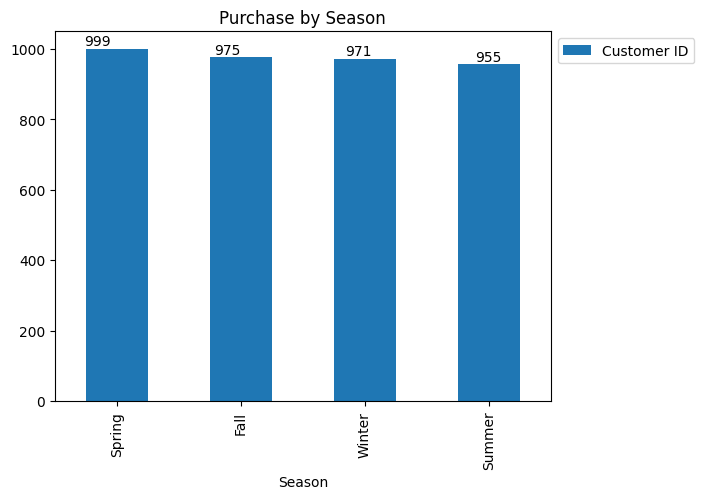

In [11]:
def make_pivot(param1):
    df_slice = df[[param1, 'Customer ID']]
    slice_pivot = df_slice.pivot_table(index=[param1], aggfunc=np.size, fill_value=0)
    
    # Mengurutkan pivot table berdasarkan jumlah customer
    slice_pivot_sorted = slice_pivot.sort_values(by='Customer ID', ascending=False)
    
    p_chart = slice_pivot_sorted.plot(kind='bar')
    plt.title("Purchase by Season")
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))

# Atur legenda di luar grafik
    p_chart.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    return slice_pivot_sorted, p_chart

pivot_table, bar_chart = make_pivot('Season')
print("Pivot Table:")
print(pivot_table)
plt.show()


(        Customer ID
 Season             
 Spring          999
 Fall            975
 Winter          971
 Summer          955,
 <Axes: title={'center': 'Purchase by Season'}, xlabel='Season'>)

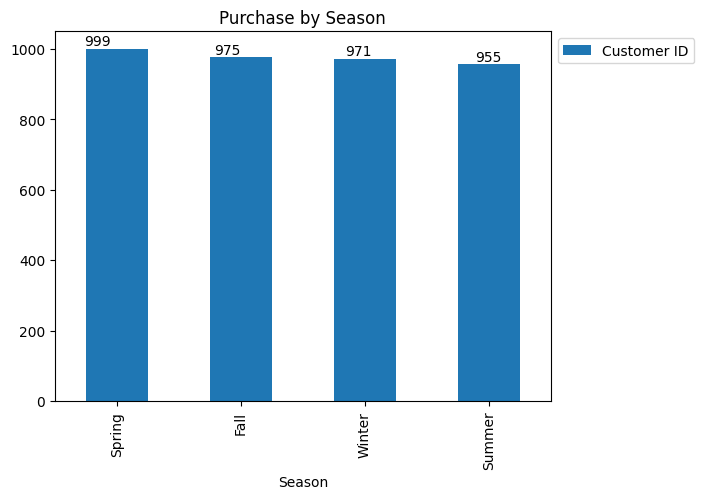

In [12]:
make_pivot('Season')

## 2. Bagaimana Review Rating pakaian berdasarkan kategorinya?

In [13]:
import pandas as pd

# Mengelompokkan data berdasarkan kategori dan menghitung rata-rata review rating
average_ratings = df.groupby('Category')['Review Rating'].mean()

print(average_ratings)

Category
Accessories    3.768629
Clothing       3.723143
Footwear       3.790651
Outerwear      3.746914
Name: Review Rating, dtype: float64


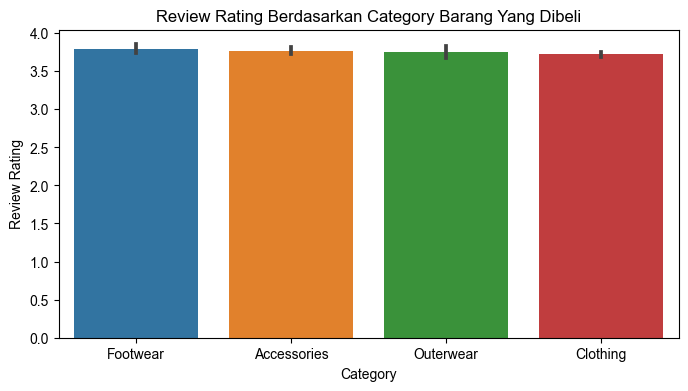

In [14]:
plt.figure(figsize=(8, 4))
sns.barplot(x ='Category',
            y ='Review Rating',
            data = df ,
            order = df.groupby('Category')
            ['Review Rating'].mean().sort_values(ascending=False).index)

plt.title('Review Rating Berdasarkan Category Barang Yang Dibeli')
sns.set_style('darkgrid')
plt.show()

## 3. Berapa jumlah pembeli laki-laki dan perempuan untuk setiap jenis shipping type?

Pivot Table:
                Customer ID
Shipping Type              
Free Shipping           675
Standard                654
Store Pickup            650
Next Day Air            648
Express                 646
2-Day Shipping          627


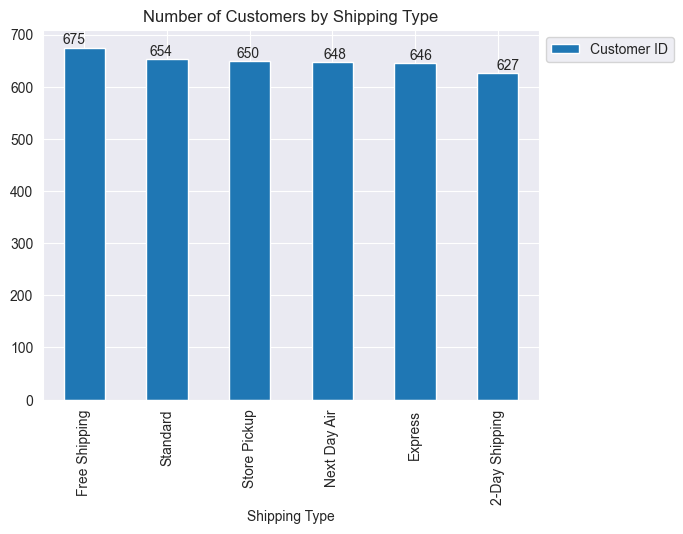

In [48]:
def make_pivot(param1):
    df_slice = df[[param1, 'Customer ID']]
    slice_pivot = df_slice.pivot_table(index=[param1], aggfunc=np.size, fill_value=0)
    
    # Mengurutkan pivot table berdasarkan jumlah customer
    slice_pivot_sorted = slice_pivot.sort_values(by='Customer ID', ascending=False)
    
    p_chart = slice_pivot_sorted.plot(kind='bar')
    plt.title("Number of Customers by Shipping Type")
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))

# Atur legenda di luar grafik
    p_chart.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    return slice_pivot_sorted, p_chart

pivot_table, bar_chart = make_pivot('Shipping Type')
print("Pivot Table:")
print(pivot_table)
plt.show()


## 4. Pembeli terbanyak berdasarkan pembeli laki-laki dan perempuan?

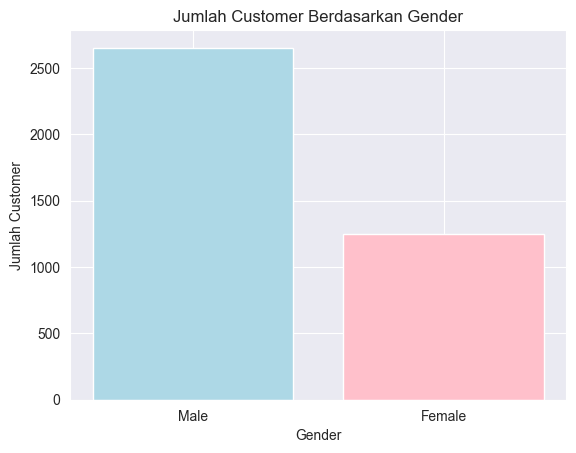

In [19]:
customer_by_gender = df['Gender'].value_counts()

customer_by_gender

# Hitung jumlah customer berdasarkan gender
gender_counts = df['Gender'].value_counts()

# Plot bar chart
plt.bar(gender_counts.index, gender_counts.values, color=['lightblue', 'pink'])
plt.title('Jumlah Customer Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Customer')
plt.show()

## 5. Metode pembayaran paling banyak yang digunakan oleh pembeli laki-laki

(               Customer ID
 Gender                Male
 Payment Method            
 Bank Transfer          428
 Cash                   451
 Credit Card            473
 Debit Card             426
 PayPal                 435
 Venmo                  439,
 <Axes: title={'center': 'Payment Method Based on Gender Male'}, ylabel='Payment Method'>)

<Figure size 1500x1000 with 0 Axes>

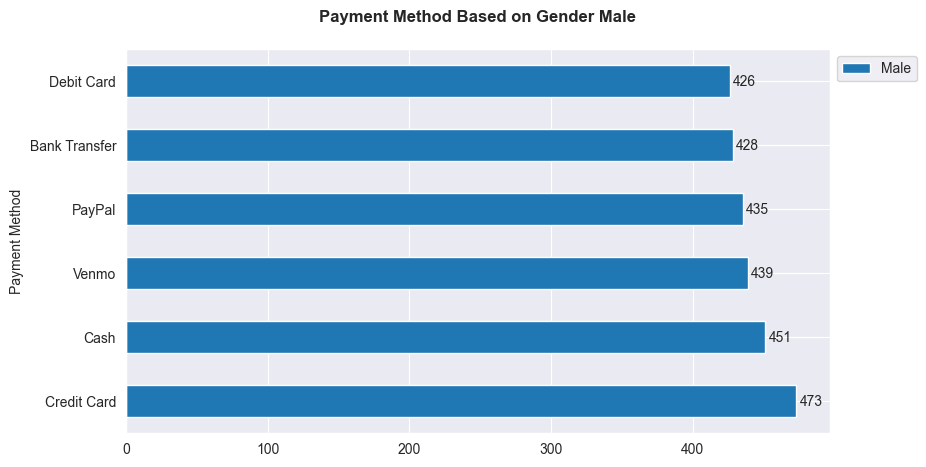

In [44]:
def make_pivot(df, param1, param2):
    df_slice = df[[param1, param2, 'Customer ID']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2], \
                                       aggfunc=np.size, fill_value=0)
    plt.figure(figsize=(15, 10))
    slice_pivot_sorted = slice_pivot.sort_values(by=('Customer ID', 'Male'), ascending=False)
    
    p_chart = slice_pivot_sorted.plot(kind='barh')

    plt.title("Payment Method Based on Gender Male", y=1.05, fontweight='bold')
    for p in p_chart.patches:
        width = p.get_width()
        plt.text(width * 1.005, p.get_y() + p.get_height() / 2, 
                 f'{int(width)}', va='center')  # Menempatkan angka di dalam batang plot
       
    # Atur garis bingkai menjadi lebih besar
    for spine in plt.gca().spines.values():
        spine.set_linewidth(1)
    
    # Atur legenda di luar grafik
    p_chart.legend_.remove()  # Hapus legenda yang digenerasikan otomatis
    
    # Tambahkan legenda manual untuk 'Male'
    plt.legend(['Male'], loc='upper left', bbox_to_anchor=(1, 1))
    
    # Atur layout dan bingkai plot
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Atur ruang di sekitar subplot
    plt.subplots_adjust(left=0.1, right=1.2, top=0.9, bottom=0.1)  # Atur posisi subplot
    
    return slice_pivot, p_chart

df_filtered = df[df['Gender'] == 'Male']  # filter DataFrame berdasarkan 'Gender' == 'Male'
make_pivot(df_filtered, 'Payment Method', 'Gender')
